# Study en fonction du nombre de neurones stables

In [1]:
import numpy as np 
import pandas as pd
from tools import get_project_path
import matplotlib.pyplot as plt

tab_partial_pruning = pd.read_csv(get_project_path("results/benchmark/6x100-0.026/FINAL/SDPu/results-partial-pruning-RLT=50.csv"))
# tab1 = tab1[tab1['model']!='LP'].copy()
# tab2 = pd.read_csv(get_project_path("results/benchmark/6x100-0.026/09_18_16h10_19s_SDPu-full-pruning-RLT=100-data-index=56-96-99/results.csv"))
# # #tab1 = tab1[tab1["data_index"]<29].copy()
# # tab2 = pd.read_csv(get_project_path("results/benchmark/9x100-0.026/09_18_15h42_46s_SDPu-full-pruning-RLT=100-28-56-96-97/results.csv"))
# #tab3 = pd.read_csv(get_project_path("results/benchmark/9x200-0.015/09_23_08h54_49s_SDPt-RLT=0.2-55-99/results.csv"))
# #tab4 = pd.read_csv(get_project_path("results/benchmark/9x200-0.015/11_05_23h21_56s_SDPt-RLT=0.2-35-44-84-99/results.csv"))  
# # # # #tab5 = pd.read_csv(get_project_path("results/benchmark/9x100-0.026/FINAL/SDP-IP/results-60-99.csv"))
# # # # # tab = pd.concat([tab1,tab2]µ)
# # # #tab2 = tab2[tab2["data_index"]<79].copy();
# tab = pd.concat([tab1, tab2]).reset_index(drop=True)

tab_full_pruning = pd.read_csv(get_project_path("results/benchmark/6x100-0.026/FINAL/SDPu/results-full-pruning-RLT=100.csv"))

Nb_neurons = 6*100

nb_stables_study = pd.read_csv(get_project_path("results/benchmark/6x100-0.026/11_15_19h35_48s_SDPu-full-pruning-RLT=0/stable_actives_study.csv"))


In [2]:
tab_full_pruning["data_index"].nunique()

100

In [3]:
tab_partial_pruning["data_index"].nunique()

31

In [4]:
print("Stable" in tab_partial_pruning.columns)
print("Stable" in tab_full_pruning.columns)

True
False


In [5]:
tab_full_pruning.columns

Index(['Unnamed: 0', 'LAST_LAYER', 'MATRIX_BY_LAYERS', 'McC_betaz_logits',
       'Nb_stable_actives', 'Nb_stable_inactives', 'RLT', 'RLT_prop', 'Tij',
       'Tij_before_penultimate_layer', 'USE_STABLE_ACTIVES',
       'USE_STABLE_INACTIVES', 'beta_logits_comparaison_1',
       'beta_logits_comparaison_2', 'bound_time', 'data_index', 'dataset',
       'dual_obj_value', 'epsilon', 'iterations', 'label', 'label_predicted',
       'model', 'nb_nodes', 'network', 'optimal_value', 'pretreatment_time',
       'primal_obj_value', 'status', 'target', 'time', 'triangularization',
       'Nb_constraints', 'total_time', 'robust'],
      dtype='object')

In [6]:


for i in range(100):
    nb_stable_actives = nb_stables_study.loc[nb_stables_study['data_index']==i, 'Number_actives_stable'] 
    nb_stable_inactives = nb_stables_study.loc[nb_stables_study['data_index']==i, 'Number_inactives_stable']

    print("stable actives:", nb_stable_actives, " stable inactives:", nb_stable_inactives)
    tab_partial_pruning.loc[tab_partial_pruning['data_index']==i, 'Nb_stable_actives'] = nb_stable_actives.values[0]
    tab_partial_pruning.loc[tab_partial_pruning['data_index']==i, 'Nb_stable_inactives'] = nb_stable_inactives.values[0]

    tab_full_pruning.loc[tab_full_pruning['data_index']==i, 'Nb_stable_actives'] = nb_stable_actives.values[0]
    tab_full_pruning.loc[tab_full_pruning['data_index']==i, 'Nb_stable_inactives'] = nb_stable_inactives.values[0]
    print(f"tab full pruning index = {i} : ", tab_full_pruning.loc[tab_full_pruning['data_index']==i, 'Nb_stable_actives'].values[0],)

tab_full_pruning["Stable"] = tab_full_pruning["Nb_stable_actives"] + tab_full_pruning["Nb_stable_inactives"]
tab_partial_pruning["Stable"] = tab_partial_pruning["Nb_stable_actives"] + tab_partial_pruning["Nb_stable_inactives"]
tab_partial_pruning["Stable_prop"] = tab_partial_pruning["Stable"] / Nb_neurons
tab_full_pruning["Stable_prop"] = tab_full_pruning["Stable"] / Nb_neurons
tab_partial_pruning["Stable_active_prop"] = tab_partial_pruning["Nb_stable_actives"] / Nb_neurons
tab_full_pruning["Stable_active_prop"] = tab_full_pruning["Nb_stable_actives"] / Nb_neurons
tab_partial_pruning["Stable_inactive_prop"] = tab_partial_pruning["Nb_stable_inactives"] / Nb_neurons
tab_full_pruning["Stable_inactive_prop"] = tab_full_pruning["Nb_stable_inactives"] / Nb_neurons 

stable actives: 0    225
Name: Number_actives_stable, dtype: int64  stable inactives: 0    301
Name: Number_inactives_stable, dtype: int64
tab full pruning index = 0 :  225
stable actives: 1    236
Name: Number_actives_stable, dtype: int64  stable inactives: 1    306
Name: Number_inactives_stable, dtype: int64
tab full pruning index = 1 :  236
stable actives: 2    244
Name: Number_actives_stable, dtype: int64  stable inactives: 2    298
Name: Number_inactives_stable, dtype: int64
tab full pruning index = 2 :  244
stable actives: 3    239
Name: Number_actives_stable, dtype: int64  stable inactives: 3    293
Name: Number_inactives_stable, dtype: int64
tab full pruning index = 3 :  239
stable actives: 4    231
Name: Number_actives_stable, dtype: int64  stable inactives: 4    305
Name: Number_inactives_stable, dtype: int64
tab full pruning index = 4 :  231
stable actives: 5    233
Name: Number_actives_stable, dtype: int64  stable inactives: 5    315
Name: Number_inactives_stable, dtype: in

In [7]:
tab_full_pruning.loc[tab_full_pruning['data_index']==56][["primal_obj_value", "dual_obj_value", "status", "Stable", "Nb_stable_actives", "Nb_stable_inactives"]]

,primal_obj_value,dual_obj_value,status,Stable,Nb_stable_actives,Nb_stable_inactives
97,-4.286782,-4.287333,0,480,212,268


In [8]:
tab_partial_pruning.loc[tab_partial_pruning['data_index']==56, ['Stable', 'Nb_stable_actives', 'Nb_stable_inactives','status']]

,Stable,Nb_stable_actives,Nb_stable_inactives,status
20,480,212,268,0


In [9]:
# tab["Stable"] = tab["Nb_stable_actives"] + tab["Nb_stable_inactives"]
# tab['Stable_prop'] = tab['Stable'] / Nb_neurons

In [10]:
tab_full_pruning["Stable_active_prop"].max()

0.4216666666666667

In [11]:
tab_partial_pruning.max()

LAST_LAYER                            False
MATRIX_BY_LAYERS                       True
McC_betaz_logits                       True
Nb_constraints                     117962.0
Nb_stable_actives                       245
Nb_stable_inactives                     300
RLT                                    True
RLT_prop                                0.5
Tij                                    True
Tij_before_penultimate_layer           True
USE_STABLE_ACTIVES                     True
USE_STABLE_INACTIVES                  False
beta_logits_comparaison_1              True
beta_logits_comparaison_2              True
bound_time                         2.468998
data_index                               99
dataset                               mnist
dual_obj_value                     2.097678
epsilon                               0.026
iterations                                6
label                                     9
label_predicted                           9
model                           

In [12]:
def preprocess_tab(tab):    
    if "RLT_prop" in tab.columns:
        tab["RLT_prop"] = tab["RLT_prop"].fillna(0)
        RLT_prop = tab["RLT_prop"].unique()
        
        print("RLT_prop:", RLT_prop)
        #RLT_props = [0, 0.1, 0.3, 0.5]
        #tab = tab[tab["RLT_prop"].isin(RLT_props)].copy()

    tab["total_time"] = tab["time"] + tab["bound_time"]
    tab["robust"] = (tab["optimal_value"] >= 0) 
    tab["target"] = tab["target"].fillna("unknown")
    return tab

tab_partial_pruning = preprocess_tab(tab_partial_pruning)
tab_full_pruning = preprocess_tab(tab_full_pruning)

RLT_prop: [0.5]
RLT_prop: [0. 1.]


In [13]:
tab

NameError: name 'tab' is not defined

In [14]:
def compute_robustness(tab, title=""):
    robust_mean_data_index = tab.groupby(["data_index", "target"])["robust"].any()
    #(robust_mean_data_index == 1).sum()
    rob = robust_mean_data_index.reset_index().groupby("data_index")["robust"].all()
    print(f"Number of robust data_index in {title}:", (rob).sum(), "/", len(rob))

compute_robustness(tab_partial_pruning, "partial_pruning")
compute_robustness(tab_full_pruning, "full_pruning")

Number of robust data_index in partial_pruning: 25 / 31
Number of robust data_index in full_pruning: 17 / 100


/tmp/ipykernel_59243/142668461.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = tab_full_pruning.groupby('Stable_prop_bin')['robust']
/tmp/ipykernel_59243/142668461.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


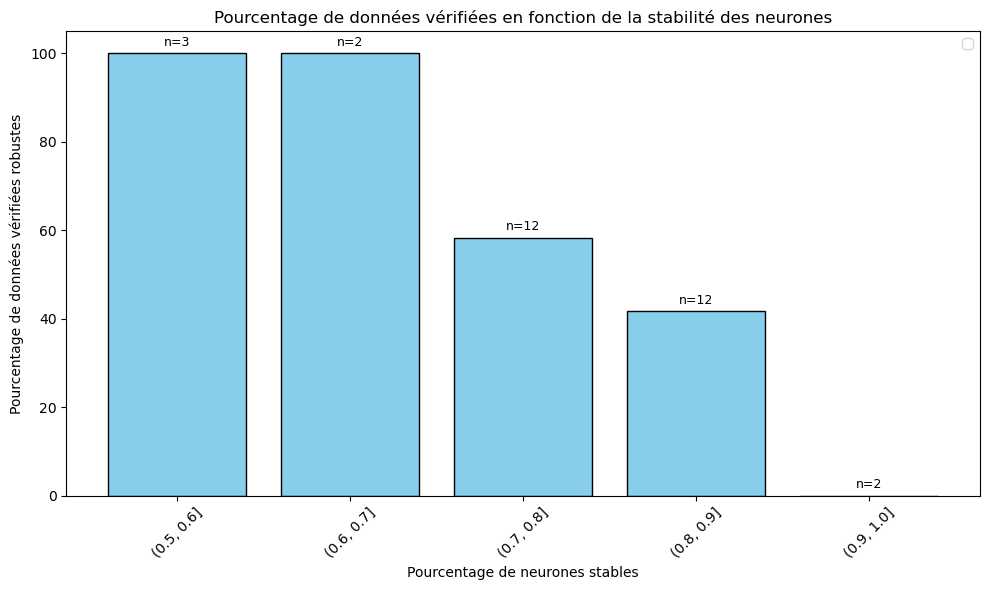

In [15]:

bins = np.arange(0, 1.1, 0.1)

tab_partial_pruning = tab_partial_pruning[tab_partial_pruning['status']!='trivially_solved'].copy()
tab_partial_pruning['Stable_prop_bin'] = pd.cut(tab_partial_pruning['Stable_prop'], bins=bins)

tab_full_pruning = tab_full_pruning[tab_full_pruning['status']!='trivially_solved'].copy()
tab_full_pruning['Stable_prop_bin'] = pd.cut(tab_full_pruning['Stable_prop'], bins=bins)

grouped = tab_full_pruning.groupby('Stable_prop_bin')['robust']
percentage = grouped.mean() * 100       # pourcentage de robust
counts = grouped.count()                # nombre d'éléments

# Plot
fig, ax = plt.subplots(figsize=(10,6))
bars = ax.bar(percentage.index.astype(str), percentage.values,
              color='skyblue', edgecolor='black')


# Labels
ax.set_ylabel('Pourcentage de données vérifiées robustes')
ax.set_xlabel('Pourcentage de neurones stables')
ax.set_title('Pourcentage de données vérifiées en fonction de la stabilité des neurones')
plt.xticks(rotation=45)
ax.legend()

# Ajouter le nombre d'éléments sur chaque barre
for bar, n in zip(bars, counts.values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1,
            f'n={n}', ha='center', va='bottom', fontsize=9)


plt.tight_layout()
plt.show()

# Etude du gap quand on prune ou pas les neurones

/tmp/ipykernel_59243/4139739922.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_full = tab_full_pruning.groupby('Stable_prop_bin')['robust']
/tmp/ipykernel_59243/4139739922.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_part = tab_partial_pruning.groupby('Stable_prop_bin')['robust']


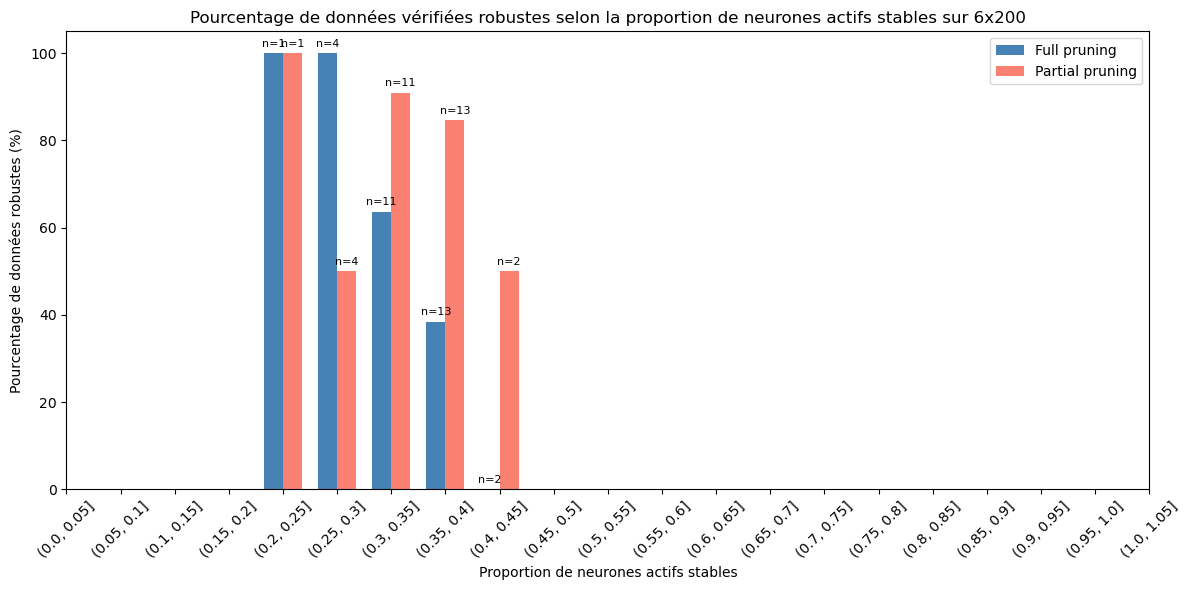

In [17]:
bins = np.arange(0, 1.1, 0.05)

# Filtrage et binning
tab_partial_pruning = tab_partial_pruning[tab_partial_pruning['status']!='trivially_solved'].copy()
tab_partial_pruning['Stable_prop_bin'] = pd.cut(tab_partial_pruning['Stable_active_prop'], bins=bins)

tab_full_pruning = tab_full_pruning[tab_full_pruning['status']!='trivially_solved'].copy()
tab_full_pruning['Stable_prop_bin'] = pd.cut(tab_full_pruning['Stable_active_prop'], bins=bins)

# Groupby
group_full = tab_full_pruning.groupby('Stable_prop_bin')['robust']
percentage_full = group_full.mean() * 100
counts_full = group_full.count()

group_part = tab_partial_pruning.groupby('Stable_prop_bin')['robust']
percentage_part = group_part.mean() * 100
counts_part = group_part.count()

# --- Plot ---
fig, ax = plt.subplots(figsize=(12,6))

x = np.arange(len(percentage_full))      # position des bins
width = 0.35                             # largeur des barres

bars_full = ax.bar(x - width/2, percentage_full.values, width,
                   label='Full pruning', color='steelblue')
bars_part = ax.bar(x + width/2, percentage_part.values, width,
                   label='Partial pruning', color='salmon')

# Labels
ax.set_ylabel('Pourcentage de données robustes (%)')
ax.set_xlabel('Proportion de neurones actifs stables')
ax.set_title('Pourcentage de données vérifiées robustes selon la proportion de neurones actifs stables sur 6x200')
ax.set_xticks(x)
ax.set_xticklabels([str(i) for i in percentage_full.index], rotation=45)
ax.legend()

# Ajouter les n sur les barres
for bars, counts in [(bars_full, counts_full), (bars_part, counts_part)]:
    for bar, n in zip(bars, counts.values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 1,
                f'n={n}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()
